

<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" title="Title text" width="20%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-479 Reconocimiento de patrones en minería de datos </h1>

<H2 align='center'> Tarea 1 - Clustering </H2>
<H3 align='center'> Lucio Fondón Rebolledo - 201773610-0</H3>
<H3 align='center'> Francisco Reyes Jainaga - 201773529-5</H3>
<hr style="height:2px;border:none"/>

# Instrucciones

1. La tarea debe ser desarrollada en parejas.  
2. Los medios de consultas serán Aula y el canal de Discord oficial del curso. 
3. La tarea debe ser realizada en Jupyter Notebook (Python3) utilizando este archivo como base.
4. Las librerías permitidas son las que se encuentran importadas en el Notebook. 
5. Se evaluará la correcta implementación de los Algoritmos de Clustering como también la comprensión de sus fundamentos teóricos y aplicaciones.
6. El archivo de entrega debe denominarse T1_Rol1_Rol2.ipynb. De no respetarse este formato existirá un descuento de 30 puntos. 
7. La fecha de entrega es el viernes 28 de mayo a las 23:55 hrs, posterior a esto se descontará 1 punto por cada minuto de atraso.  

# Parte 1 (55 pts)

En esta primera parte de la tarea se estudiarán los algoritmos de Clustering K-means, Clustering jerárquico aglomerativo y DBSCAN, aplicados a 3 datasets de tipo vectorial. El objetivo es contrastar estos 3 algoritmos y determinar ventajas y desventajas frente a cada caso de estudio. Además, analizar el impacto de la elección de parámetros y medidas de proximidad. 

Para las implementaciones solicitadas, no necesitan generar el código de cada algoritmo a mano, por lo que pueden hacer uso de librerías que tengan estos algoritmos ya implementados. 

## 1.1 Dataset

Para esta primera parte se cuenta con 3 archivos:

1. <b>Spiral.txt</b> : $N=312, D=2$
2. <b>R15.txt</b> : $N=600, D=2$
3. <b>cute-t2-4k.txt</b> : $ N=4200, D=2$

Cada uno correspondiente a un dataset vectorial bidimensional, donde cada fila del archivo tiene el formato: $x_1$\t$x_2$. Siendo $x_1$ y $x_2$ los atributos de cada dato $X^{(i)}$ $\in \mathbf{R} ^{2}$ . 
Los datasets tienen una cantidad de puntos de 312, 600 y 4200 respectivamente.

In [359]:
#Librerías 
%matplotlib inline
import sklearn.cluster as skl
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pylab as pl
import pandas as pd
import scipy
from ipywidgets import interact, interactive, fixed, interact_manual

In [451]:
#data_array: Función que devuelve un np.array de tamaño [n, D]
#Parámetros: file -> nombre del archivo 

#data_plot: Función que genera una gráfica del dataset 
#especificado en el parámetro file

spiral_df = pd.read_csv("Spiral.txt", delimiter = "\t", header = None)
r15_df = pd.read_csv("R15.txt", delimiter = "\t", header = None)
cure_df = pd.read_csv("cure-t2-4k.txt", delimiter = "\t", header = None)

colors = ['salmon','khaki','silver','lightgreen','steelblue',
          'pink','lightblue','orchid','sienna','grey','lightcoral',
          'chocolate', 'maroon', 'tan', 'olivedrab','olive', 
          'dodgerblue', 'crimson', 'navy', 'fuchsia', 'aqua']

def data_array(file):
    data = np.loadtxt(file)
    return data

def data_plot(file):
    data = data_array(file)
    plt.title("Dataset") 
    plt.xlabel("x_1") 
    plt.ylabel("x_2") 
    plt.plot(data[:,0], data[:,1],"ob", color="c") 
    plt.show() 

#Ejemplo de uso de la función interact 
interact(data_plot, file=["Spiral.txt","R15.txt","cure-t2-4k.txt"])

interactive(children=(Dropdown(description='file', options=('Spiral.txt', 'R15.txt', 'cure-t2-4k.txt'), value=…

<function __main__.data_plot(file)>

## 1.2 K-Means (15 puntos)

1. Aplicar el algoritmo K-Means a cada uno de los datasets, utilizando distancia euclideana como medida de proximidad.
2. Realizar una gráfica para cada dataset donde se distinga claramente cada cluster obtenido y sus centroides.
3. Finalmente responder: 

    >a. ¿En cuál dataset se obtiene un mejor resultado utilizando este algoritmo? ¿Por qué? 
    
    >b. ¿Qué valor de k (cantidad de centroides) entrega un mejor resultado para cada uno de los datasets? ¿Qué método se podría utilizar para determinar un valor óptimo para k? 
    
<i> Hint: Para la pregunta 3.b, se sugiere utilizar la función interact de la librería [ipywidget](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html).</i>

In [440]:
cant_cluster = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

def func_kmeans(archivo, n_clusters):
    X = data_array(archivo)
    k_means = skl.KMeans(n_clusters).fit(X)

    centroids = k_means.cluster_centers_
    print("Centroides de " + archivo + "\n", centroids)
    
    score = metrics.silhouette_score(X, k_means.labels_, metric='euclidean')
    print('Silhouetter Score: %.3f' % score)

    for k,color in zip(range(n_clusters),colors):
        my_members = k_means.labels_ == k
        cluster_center = centroids[k]
        plt.scatter(X[my_members, 0], X[my_members, 1],color = color)
        plt.scatter(cluster_center[0], cluster_center[1])
    plt.title('KMeans - Spiral.txt')
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
def elbow_kmeans(archivo):
    Rango = range(1, 10)
    kmeans = [skl.KMeans(n_clusters=i) for i in Rango]

    #Método del codo para hayar k adecuado
    X = data_array(archivo)
    puntaje = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
    plt.figure(figsize=(8,6))
    plt.plot(Rango,puntaje, '.-')
    plt.xlabel('N de clusters')
    plt.ylabel('Puntaje')
    plt.title('Elbow Method ' +  archivo)
    plt.show()
              
def silhouette_kmeans(archivo):
    X = data_array(archivo)
    rango_silhouette = range(2,40)

    k_means = [skl.KMeans(n_clusters=i).fit(X) for i in rango_silhouette]

    silhouette = [] 

    for k_mean in k_means:
        score = metrics.silhouette_score(X, k_mean.labels_, metric='euclidean')
        silhouette.append(score)

    plt.figure(figsize=(8,6))
    plt.plot(rango_silhouette,silhouette, '.-')
    plt.xlabel('N de clusters')
    plt.ylabel('Silhouette Coefficient')
    pblt.title('Silhouette '+ archivo)

    print("El cluster que maximiza Silhouette es " + str(silhouette.index(max(silhouette))+2))

    plt.show()

### K-Means Spiral

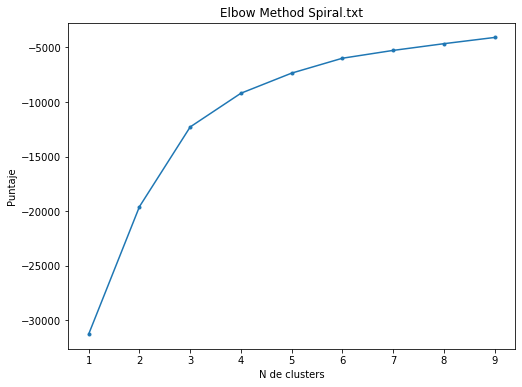

El cluster que maximiza Silhouette es 38


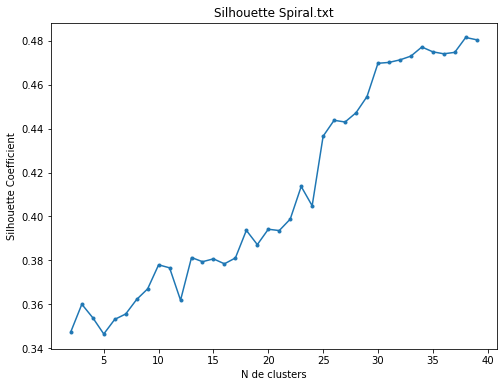

In [362]:
elbow_kmeans('Spiral.txt')
silhouette_kmeans('Spiral.txt')

In [363]:
# Para dataset "Spiral.txt"
interact(func_kmeans,archivo="Spiral.txt", n_clusters = cant_cluster)

interactive(children=(Text(value='Spiral.txt', description='archivo'), Dropdown(description='n_clusters', opti…

<function __main__.func_kmeans(archivo, n_clusters)>

### K-Means R15

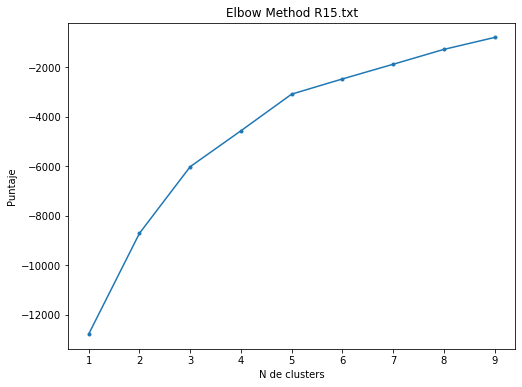

El cluster que maximiza Silhouette es 15


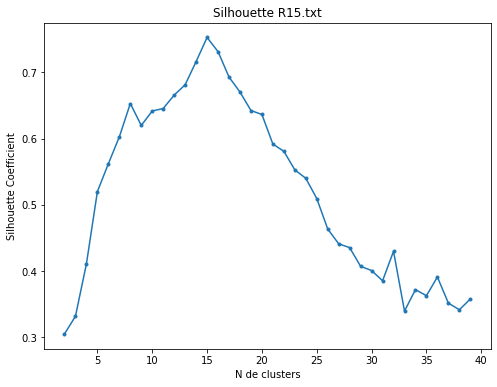

In [364]:
elbow_kmeans('R15.txt')
silhouette_kmeans('R15.txt')

In [365]:
# Para dataset "R15.txt"
interact(func_kmeans,archivo="R15.txt", n_clusters = cant_cluster)

interactive(children=(Text(value='R15.txt', description='archivo'), Dropdown(description='n_clusters', options…

<function __main__.func_kmeans(archivo, n_clusters)>

### K-Means Cure

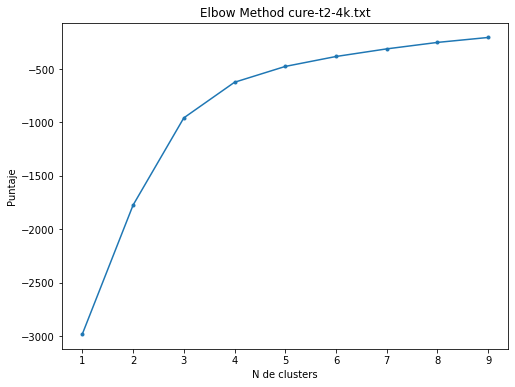

El cluster que maximiza Silhouette es 10


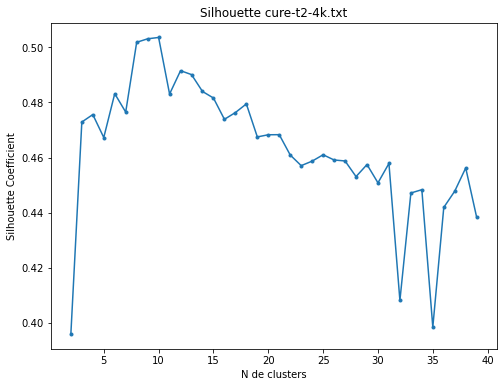

In [366]:
elbow_kmeans('cure-t2-4k.txt')
silhouette_kmeans('cure-t2-4k.txt')

In [367]:
# Para dataset "cure-t2-4k.txt"
interact(func_kmeans,archivo="cure-t2-4k.txt", n_clusters = cant_cluster)


interactive(children=(Text(value='cure-t2-4k.txt', description='archivo'), Dropdown(description='n_clusters', …

<function __main__.func_kmeans(archivo, n_clusters)>

## 1.3 DBSCAN (15 puntos)

1. Aplicar el algoritmo DBSCAN a cada uno de los datasets.
2. Realizar una gráfica para cada dataset donde se distinga claramente cada cluster obtenido.
3. Finalmente responder: 
    > a. ¿En cuál dataset se obtiene un mejor resultado utilizando este algoritmo? ¿Por qué?
    
    > b. ¿Qué parámetros de Eps y minPts entregan el mejor resultado para cada gráfico? ¿Qué estrategia podríamos utilizar para escoger estos parámetros?  
    
<i> Hint: Para la pregunta 3.b, se sugiere utilizar la función interact de la librería [ipywidget](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html).</i>

In [368]:
#Implementación
from sklearn.cluster import DBSCAN
from sklearn import metrics
import ipywidgets as widgets
# los parametros variables son eps(radio) y min_samples(cant minima de puntos dentro)

def func_DBSCAN(archivo,eps, minimum_samples):
    X = data_array(archivo)
    db = DBSCAN(eps, minimum_samples).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("Número de clusters: "+ str(n_clusters_))
    print(n_noise_)

    #conjunto de labels
    unique_labels = set(labels)

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # ruido
            col = "black"

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], '.', color = col, markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', color = col, markersize=6)

    plt.title('Cantidad de clusters apróx: %d' % n_clusters_)
    plt.show()

#usar grafico del profe para ver mejor opcion, distancia promedio vs cant vecinos promedio

In [ ]:
def k_distances2(x, k):
    dim0 = x.shape[0] #cantidad de datos
    dim1 = x.shape[1] #cantidad de columnas

    p=-2*x.dot(x.T)+np.sum(x**2, axis=1).T+ np.repeat(np.sum(x**2, axis=1),dim0,axis=0).reshape(dim0,dim0)
    p = np.sqrt(p) #distancia
    p.sort(axis=1)
    p=p[:,:k]
    pm= p.flatten()
    pm= np.sort(pm)
    return p, pm


### DBSCAN Spiral

c:\users\lucio\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


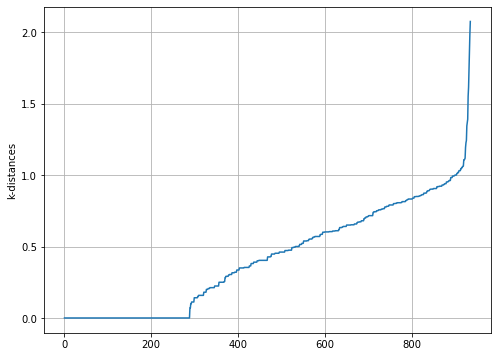

In [418]:
X_spiral = data_array('Spiral.txt')
m, m2= k_distances2(X_spiral, 3)
plt.plot(m2)
plt.ylabel("k-distances")
plt.grid(True)
plt.show()

In [421]:
interact(func_DBSCAN,archivo = 'Spiral.txt', eps = widgets.FloatSlider(min=0.1, max=3.7, step=0.1, value=1.0), minimum_samples = widgets.IntSlider(min=1, max=11, step=1, value=4))


interactive(children=(Text(value='Spiral.txt', description='archivo'), FloatSlider(value=1.0, description='eps…

<function __main__.func_DBSCAN(archivo, eps, minimum_samples)>

### DBSCAN R15

c:\users\lucio\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


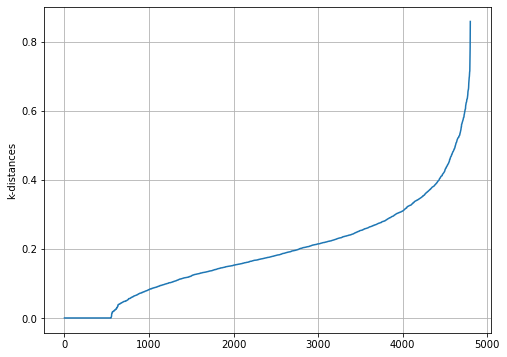

In [423]:
X_R15 = data_array('R15.txt')
m, m2= k_distances2(X_R15, 8)
plt.plot(m2)
plt.ylabel("k-distances")
plt.grid(True)
plt.show()

In [422]:
interact(func_DBSCAN,archivo = 'R15.txt', eps = widgets.FloatSlider(min=0.1, max=3.7, step=0.1, value=1.0), minimum_samples = widgets.IntSlider(min=1, max=11, step=1, value=4))

interactive(children=(Text(value='R15.txt', description='archivo'), FloatSlider(value=1.0, description='eps', …

<function __main__.func_DBSCAN(archivo, eps, minimum_samples)>

### DBSCAN Cure

c:\users\lucio\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


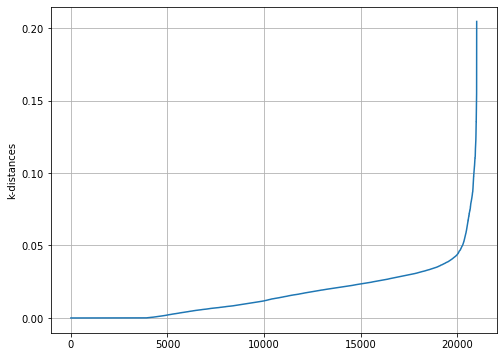

In [420]:
X_cure = data_array('cure-t2-4k.txt')
m, m2= k_distances2(X_cure, 5)
plt.plot(m2)
plt.ylabel("k-distances")
plt.grid(True)
plt.show()

In [424]:
interact(func_DBSCAN,archivo = 'cure-t2-4k.txt', eps = widgets.FloatSlider(min=0.01, max=0.17, step=0.01, value=0.1), minimum_samples = widgets.IntSlider(min=1, max=11, step=1, value=1))


interactive(children=(Text(value='cure-t2-4k.txt', description='archivo'), FloatSlider(value=0.1, description=…

<function __main__.func_DBSCAN(archivo, eps, minimum_samples)>

## 1.4 Hierarchical Agglomerative Clustering  (15 puntos)

1. Aplicar el algoritmo HAC a cada uno de los datasets, utilizando tanto single link como complete link. Puede escoger la cantidad de cluster que estime conveniente. 
2. Realizar una gráfica para cada dataset donde se distinga claramente cada cluster obtenido.
3. Finalmente responder: 

    > a. ¿En cuál dataset se obtiene un mejor resultado utilizando este algoritmo? ¿Por qué? 
    
    > b. ¿En cuál o cuáles datasets se obtiene un mejor resultado para HAC utilizando single-link? ¿Por qué?  
    

In [445]:
#Implementación
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

def func_dendogram(archivo, metodo_mezcla):
    X = data_array(archivo)

    linked = linkage(X, metodo_mezcla)

    labelList = range(1, len(X)+1)

    plt.figure(figsize=(10, 7))
    dendrogram(linked,
               p = 8,
                truncate_mode='level',
                orientation='top',
                labels=labelList,
                distance_sort='descending',
                show_leaf_counts=True)
    plt.show()
    
def silhouette_HAC(archivo):

    X = data_array(archivo)
    rango_silhouette = range(2,40)

    HACs = [AgglomerativeClustering(n_clusters=i).fit(X) for i in rango_silhouette]

    silhouette = [] 

    for HAC in HACs:
        score = metrics.silhouette_score(X, HAC.labels_, metric='euclidean')
        silhouette.append(score)

    plt.figure(figsize=(8,6))
    plt.plot(rango_silhouette,silhouette, '.-')
    plt.xlabel('N de clusters')
    plt.ylabel('Silhouette Coefficient')
    plt.title('Silhouette Method ' + archivo)

    print("El cluster que maximiza Silhouette es " + str(silhouette.index(max(silhouette))+2))

    plt.show()
    
def func_HAC(archivo,n_clusters, metodo_mezcla):
    cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage=metodo_mezcla)
    X = data_array(archivo)
    cluster.fit_predict(X)
    plt.figure(figsize=(10, 7))
    plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')
    plt.show()

### HAC Spiral

interactive(children=(Dropdown(description='archivo', options=('Spiral.txt',), value='Spiral.txt'), Dropdown(d…

El cluster que maximiza Silhouette es 38


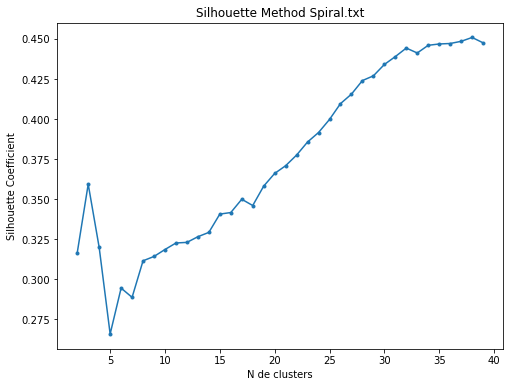

interactive(children=(Dropdown(description='archivo', options=('Spiral.txt',), value='Spiral.txt'), IntSlider(…

<function __main__.func_HAC(archivo, n_clusters, metodo_mezcla)>

In [457]:
interact(func_dendogram, archivo = ["Spiral.txt"], metodo_mezcla = ['single','complete'])
silhouette_HAC('Spiral.txt')
interact(func_HAC, archivo = ["Spiral.txt"], n_clusters = widgets.IntSlider(min=2, max=20, step=1, value=5) ,metodo_mezcla = ['single','complete'])

### HAC R15

interactive(children=(Dropdown(description='archivo', options=('R15.txt',), value='R15.txt'), Dropdown(descrip…

El cluster que maximiza Silhouette es 15


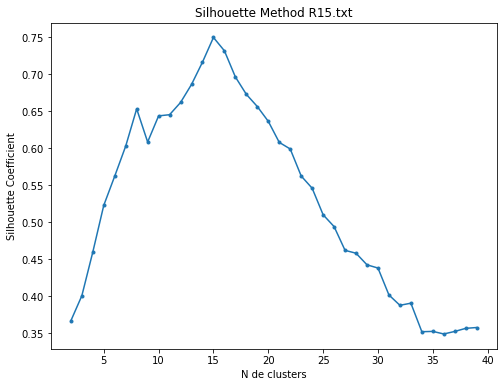

interactive(children=(Dropdown(description='archivo', options=('R15.txt',), value='R15.txt'), IntSlider(value=…

<function __main__.func_HAC(archivo, n_clusters, metodo_mezcla)>

In [449]:
interact(func_dendogram, archivo = ["R15.txt"], metodo_mezcla = ['single','complete'])
silhouette_HAC('R15.txt')
interact(func_HAC, archivo = ["R15.txt"], n_clusters = widgets.IntSlider(min=2, max=20, step=1, value=5) ,metodo_mezcla = ['single','complete'])

### HAC Cure

interactive(children=(Dropdown(description='archivo', options=('cure-t2-4k.txt',), value='cure-t2-4k.txt'), Dr…

El cluster que maximiza Silhouette es 4


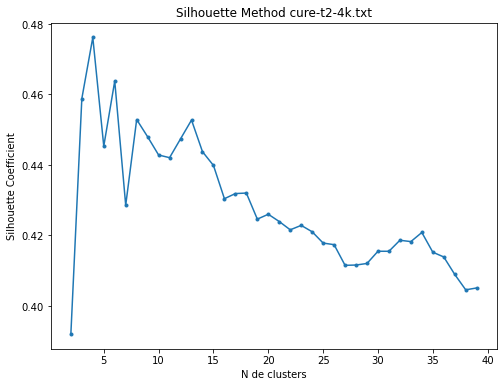

interactive(children=(Dropdown(description='archivo', options=('cure-t2-4k.txt',), value='cure-t2-4k.txt'), In…

<function __main__.func_HAC(archivo, n_clusters, metodo_mezcla)>

In [450]:
interact(func_dendogram, archivo = ["cure-t2-4k.txt"], metodo_mezcla = ['single','complete'])
silhouette_HAC('cure-t2-4k.txt')
interact(func_HAC, archivo = ["cure-t2-4k.txt"], n_clusters = widgets.IntSlider(min=2, max=20, step=1, value=5) ,metodo_mezcla = ['single','complete'])

## 1.5 Conclusiones  (10 puntos)

Analizando las gráficas obtenidas, responda las siguientes preguntas:
> a. ¿Qué algoritmo entregó un mejor resultado para cada dataset? Compare las ventajas y desventajas de cada algoritmo utilizado en relación a las características de los clusters de cada dataset y concluya. Para esta comparación, básese en los resultados para los mejores valores de k, Pts y minPts obtenidos. 

> b. ¿Qué algoritmo entregó el peor resultado para cada dataset? Justifique. 

---
# Parte 2 - Image Segmentation (20 pts)

La segmentación de imagen (Image Segmentation) es un problema de visión computacional que apunta al particionamiento de una imagen en diferentes áreas de pixeles que tienen atributos similares. Eso se realiza generando una máscara sobre la imagen que asigna una etiqueta a cada pixel y donde pixeles con la misma etiqueta forman parte de la misma región. 

La segmentación de imágenes se utiliza principalmente para detectar objetos o bordes en imágenes, y tiene diversas aplicaciones como lo son la identificación de células cancerígenas en exámenes médicos, identificación de cuerpos de interés en imágenes satelitales, entre otras. 


<img src="https://dl.acm.org/cms/attachment/8542befb-3134-46f0-a5ad-1534c63188b4/csur5204-73-f01.jpg" title="Title text" width="80%" />
<center> <i> Figura 1. Ejemplo de Image Segmentation. </i> </center>


## Preguntas

 
1. Realice Image Segmentation utilizando el algoritmo K-Means para la imagen1.jpg y la imagen2.jpg
2. Muestre gráficamente el resultado de la segmentación en ambas imágenes donde se distingan claramente los clusters obtenidos. Concluya.

> Para la pregunta 1, antes de realizar la segmentación se debe realizar un preprocesamiento de las imágenes que consiste en lo siguiente: 

> 1.En primer lugar, se debe vectorizar la imagen transformando la imagen inicial de dimensiones $p_{w}xp_{h}x3$ en  un array resultante de dimensiones $Kx3$, siendo $K= p_{h}p_{w}$ donde $p_w$ y $p_h$ son el número de pixeles de ancho y alto de la foto respectivamente. 

> 2.Antes de aplicar la segmentación con K-Means, se debe transformar los valores del arreglo resultante desde uint8 a float32 para poder aplicar el algoritmo K-Means implementado en la librería cv2.


In [379]:
#Preprocesamiento de las imágenes
import cv2

im1 = cv2.imread('imagen1.jpg') #esta está en BGR, no es necesario cambiar
ph_1, pw_1, _ = im1.shape

im2 = cv2.imread('imagen2.jpg')
im2 = cv2.cvtColor(im2,cv2.COLOR_BGR2RGB) #esta está en RGB, se cambia

ph_2, pw_2, _ = im2.shape

print("Imagen 1: pw_1 (pixeles de ancho) = %d ph_1 (pixeles de alto) = %d" % (pw_1, ph_1))
print("Imagen 2: pw_2 (pixeles de ancho) = %d ph_2 (pixeles de alto) = %d" % (pw_2, ph_2))

#imagenes vectorizadas listas para hacer image segmentation
im1_vectorized = np.reshape(im1, (pw_1 * ph_1, 3)).astype(np.float32) 
im2_vectorized = np.reshape(im2, (pw_2 * ph_2, 3)).astype(np.float32)

print("Dimensiones imagen1.jpg vectorizada: " + str(im1_vectorized.shape))
print("Dimensiones imagen2.jpg vectorizada: " + str(im2_vectorized.shape))


Imagen 1: pw_1 (pixeles de ancho) = 286 ph_1 (pixeles de alto) = 176
Imagen 2: pw_2 (pixeles de ancho) = 500 ph_2 (pixeles de alto) = 500
Dimensiones imagen1.jpg vectorizada: (50336, 3)
Dimensiones imagen2.jpg vectorizada: (250000, 3)


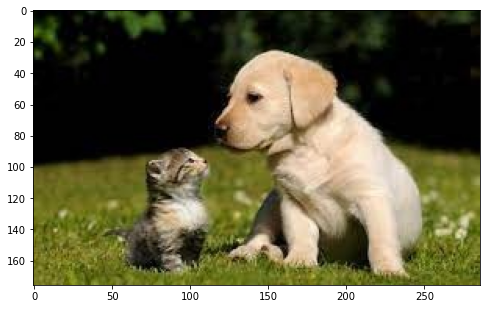

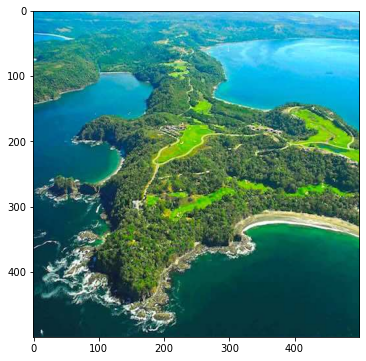

In [417]:
plt.imshow(im1)
plt.show()

plt.imshow(im2)
plt.show()

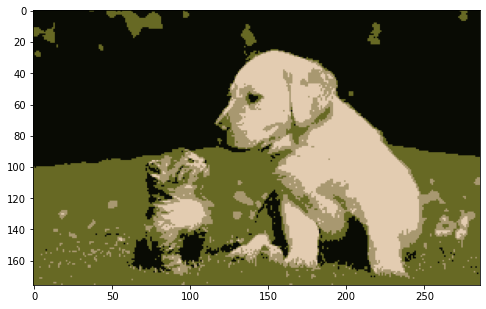

In [416]:
#Imagen perro y gato
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 4
_, labels, (centers) = cv2.kmeans(im1_vectorized, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)


labels = labels.flatten()

segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(im1.shape)
plt.imshow(segmented_image)
plt.show()

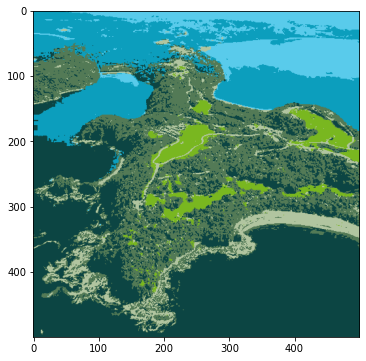

In [412]:
#Imagen isla
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 6
_, labels, (centers) = cv2.kmeans(im2_vectorized, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)

labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(im2.shape)
plt.imshow(segmented_image)
plt.show()

---
# Parte 3 - Community Detection (25 pts) 

En la última parte de la tarea, se estudiará el algoritmo Louvain para Detección de Comunidades aplicado al dataset de grafos "Enron email network". 

## Dataset

* Para esta parte de la tarea, trabajaremos con el dataset de grafos <b>"Enron email network"</b>, el cual contiene las interacciones vía correo electrónico de 36692 trabajadores y trabajadoras de la compañía energética estadounidense "Enron". 
* Este dataset se encuentra contenido en el archivo adjunto "Email-Enron.txt" en el cual se enumeran todos los pares de correos electrónicos de dicha empresa entre los cuales se ha enviado al menos un mensaje. 
* El archivo contiene 183831 líneas, las cuales corresponden al total de aristas no dirigidas del grafo y su formato por línea es:

<blockquote> #Nodo_origen \t #Nodo_destino. </blockquote>

## Community Detection

El problema de <b>Detección de Comunidades</b> es un problema fundamental en análisis de redes y consiste en buscar grupos de nodos que tengan ciertas propiedades en común y que, por tanto, sean más similares entre si que con otros nodos. A estos conjuntos de nodos les llamamos "comunidades". 

Si modelamos las interacciones de un conjunto de personas en un determinado contexto como un grafo, tendríamos que los nodos corresponderían a las personas y las aristas a las interacciones entre ellas. En este contexto, podemos definir a una comunidad como un subconjunto de nodos del grafo que están densamente conectados entre sí y débilmente conectados a los nodos en otras comunidades dentro del grafo. 

Para esto, podemos utilizar el algoritmo Louvain de Detección de comunidades para realizar Clustering en grafos, en el cual los clusters obtenidos corresponderán a las comunidades dentro del grafo. 


## Algoritmo Louvain 

Es un algoritmo para detección de comunidades en redes complejas o grafos, ideado en 2008 por investigadores de la Universidad Católica de Bélgica, cuyo objetivo es maximizar la modularidad de un grafo. 

¿Qué es la modularidad? Es una medida que compara la cantidad de aristas dentro y fuera de la comunidad, la cual está expresada por la siguiente ecuación para grafos con peso:  

\begin{equation*}
    Q = \dfrac{1}{2m} \sum_{i,j} [ A_{ij} - \dfrac{k_{i}k_{j}}{2m}] \delta (c_{i}, c_{j})
\end{equation*}

Donde:

* $A_{ij}$ es el peso de la arista entre $i$ y $j$
* $k_{i}$, $k_{j}$ son la suma de los pesos de las aristas conectadas a los nodos i y j respectivamente
* $m$ es la suma de todos los pesos de las aristas en el grafo
* $\delta$ es la función delta de Kronecker. La cual es 1 si $x = y$ y 0 en el caso contrario. 
* $Q \in [-1,1]$


Para optimizar la modularidad, el algoritmo realiza los siguientes pasos: 
1. Inicialmente, cada nodo constituye una comunidad. 
2. Luego, se selecciona un nodo al azar y se evalúa si la partición tiene mejor modularidad al asignar dicho nodo a la comunidad de alguno de sus vecinos. 
3. Si la modularidad de la partición actual es mejor, el nodo se queda en su comunidad. 
4. Si la modularidad de la partición al asignar el nodo a uno de sus vecinos es mejor, se asigna dicho nodo a la comunidad de dicho vecino. 
5. Se sigue seleccionando nodos al azar y realizando los pasos anteriores, hasta que las particiones obtenidas en dos pasos seguidos sean iguales. 


> Para esta implementación, se debe instalar la librería [Python-Louvain](https://github.com/taynaud/python-louvain) (<i>leer documentación y pasos de instalación</i>). Además, utilice la librería networkx para elaborar el grafo. 

In [383]:
#Librerías
import pandas as pd
import community as community_louvain
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt

## Preguntas

1. Cargar el dataset en un grafo de networkx.
2. Aplicar el algoritmo Louvain para Clustering en el grafo. 
3. Generar un nuevo archivo "out.txt" con los nodos etiquetados. 
4. Mostrar gráficamente 5 comunidades. No importa si estas comunidades están conectadas las unas a las otras.  

1)

In [384]:
email_df = pd.read_csv("Email-Enron.txt", delimiter = "\t", header = 3)
email_df

,# FromNodeId,ToNodeId
0,0,1
1,1,0
2,1,2
3,1,3
4,1,4
...,...,...
367657,36688,36686
367658,36688,36687
367659,36689,36690
367660,36690,36689


2)

In [385]:
partition = community_louvain.best_partition(G)

3)

In [386]:
f = open("out.txt", "w")

f.write("Nodo	Comunidad\n")

for nodo, comunidad in partition.items():
    f.write(str(nodo) + "\t" + str(comunidad) + "\n")

f.close()

4)

In [387]:
partitioned_df = pd.read_csv("out.txt", delimiter = "\t", header = 0)
partitioned_df

,Nodo,Comunidad
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
36687,36679,13
36688,36680,13
36689,36681,13
36690,36689,32


In [401]:
cant_comunidades = partitioned_df.groupby('Comunidad').count()
cant_comunidades = cant_comunidades[(cant_comunidades['Nodo'] > 15) & (cant_comunidades['Nodo'] < 200)]
comunidades = list(cant_comunidades.head().index)
filtro_partitioned_df = partitioned_df[partitioned_df['Comunidad'].isin(comunidades)]

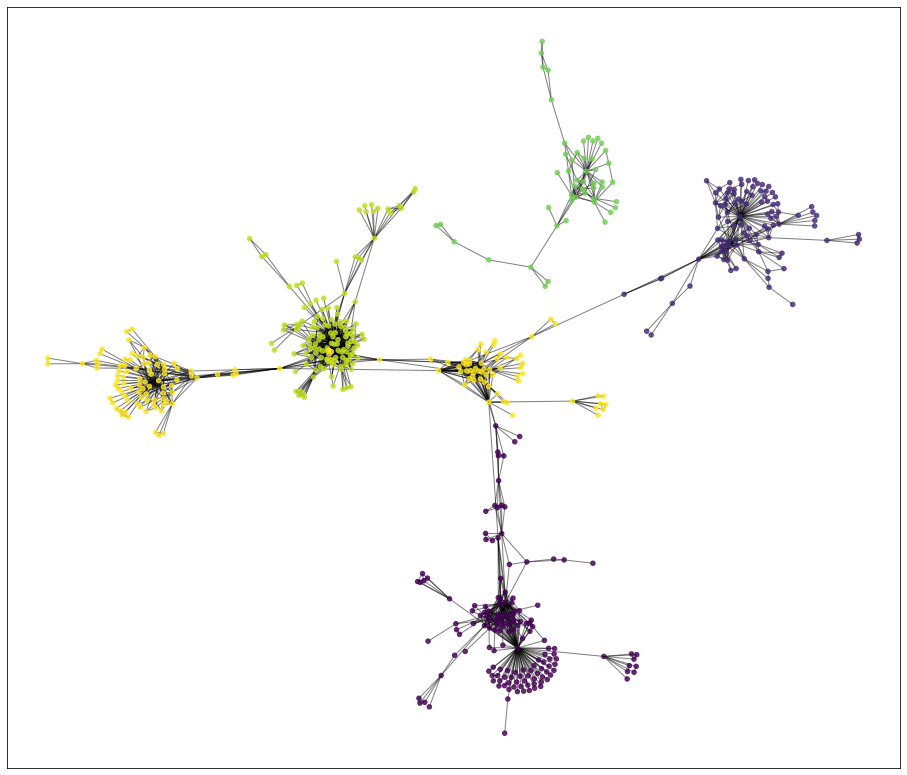

In [456]:
valores_nodos = filtro_partitioned_df['Nodo'].values
comunidades_nodos = filtro_partitioned_df['Comunidad'].values

boolean_series = email_df['# FromNodeId'].isin(valores_nodos) & email_df['ToNodeId'].isin(valores_nodos)

filtered_df = email_df[boolean_series]

G_filtrado = nx.from_pandas_edgelist(filtered_df, '# FromNodeId', 'ToNodeId')
pos = nx.spring_layout(G_filtrado)
cmap = cm.get_cmap('viridis', max(comunidades) + 1)

nx.draw_networkx_nodes(G_filtrado, pos, valores_nodos, node_size=20,
                       cmap=cmap, node_color=comunidades_nodos, alpha=0.8)
nx.draw_networkx_edges(G_filtrado, pos, alpha=0.5)
plt.rcParams["figure.figsize"] = [16,14]
plt.show()
plt.rcParams["figure.figsize"] = [8,6]